In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

importing data

In [2]:
data=pd.read_csv('Social_Network_Ads.csv')
print(data.head())

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [3]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Checking for null values

In [4]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Data Splitting

In [5]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

Scaling Features

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Model Training

In [14]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',probability=True)
svc.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

In [15]:
svc.score(x_train,y_train)

0.8233333333333334

Prediction and model evaluation

In [16]:
y_pred=svc.predict(x_test)

In [17]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_test,y_pred))

precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



In [18]:
confusion_matrix(y_test,y_pred)

array([[66,  2],
       [ 8, 24]])

In [19]:
accuracy_score(y_test,y_pred)

0.9

Cumulative Accuracy Profile

In [47]:
max_ones=y_test.sum()

probabilities=svc.predict_proba(x_test)
probabilities=probabilities[:,1].reshape(-1,1)
l=[y for _,y in sorted(zip(probabilities,y_test),reverse=True)]
y_scale=np.append([0],np.cumsum(l))

x_scale=np.arange(0,len(y_test)+1)
middle=int(50*len(y_test)/100)

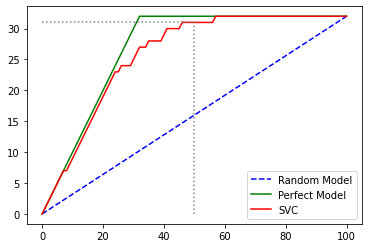

In [53]:
plt.plot([0,len(y_test)],[0,max_ones],color='blue',linestyle='dashed',label='Random Model')
plt.plot([0,max_ones,len(y_test)],[0,max_ones,max_ones],color='green',label='Perfect Model')
plt.plot(x_scale,y_scale,color='red',linestyle='solid',label='SVC')
plt.plot([middle,middle],[0,y_scale[middle]],linestyle='dotted',color='grey')
plt.plot([0,middle],[y_scale[middle],y_scale[middle]],color='grey',linestyle='dotted')
plt.legend()

In [55]:
print(100*y_scale[middle]/max_ones)

96.875
